# DL part of Thesis Implementation for NSL-KDD

## Step 1: Data Loading and Understanding

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing Pandas Library for data processing
import pandas as pd
# Provide path where the dataset is present
dataPath = 'nslkdd\\'
# Load training data from disk
trainData = pd.read_csv(dataPath + 'KDDTrain+.txt')
# Load training data from disk
testData = pd.read_csv(dataPath + 'KDDTest+.txt')

#Combining both data
comData = pd.concat([trainData, testData])

# Display of training data
print("\033[1mTraining Data Table")
display(comData)
# Load attacks type data
attackFile = pd.read_csv(dataPath + 'training_attack_types.txt', delimiter = ' ')
#Display attack types, categories, length of train and test datasets
attackCats = attackFile['attack_category'].unique()
attackTypes = attackFile['attack_type'].unique()
# Printing data
print('\033[1mTotal attacks categories in the dataset are '+ str(len(attackCats)) +
      ' which are \033[0m\n{}'.format(attackCats))
print('\n\033[1mThese categories are mapped at '+ str(len(attackTypes)) +
      'attacks types which are \033[0m\n{}'.format(attackTypes))
print('\n\033[1mTraining Data samples are '+ str(len(trainData)) + ' which contains '+ str(trainData.shape[1]) +' features')
print('\n\033[1mTesting Data samples are '+ str(len(testData)))


Training Data Table


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


Total attacks categories in the dataset are 39 which are 
['apache2' 'back' 'mailbomb' 'processtable' 'snmpgetattack' 'teardrop'
 'smurf' 'land' 'neptune' 'pod' 'udpstorm' 'ps' 'buffer_overflow' 'perl'
 'rootkit' 'loadmodule' 'xterm' 'sqlattack' 'httptunnel' 'ftp_write'
 'guess_passwd' 'snmpguess' 'imap' 'spy' 'warezclient' 'warezmaster'
 'multihop' 'phf' 'named' 'sendmail' 'xlock' 'xsnoop' 'worm' 'nmap'
 'ipsweep' 'portsweep' 'satan' 'mscan' 'saint']

These categories are mapped at 4attacks types which are 
['dos' 'u2r' 'r2l' 'probe']

Training Data samples are 125973 which contains 43 features

Testing Data samples are 22544


##  Step 2: Data Cleaning

### Mapping attack categories to attack types

In [3]:
# For loop to iterate over attack categories
for attCat, attType in zip(attackFile.attack_category, attackFile.attack_type):
    # Replace attack categories with types for training data
    comData.loc[comData.attack_category == attCat, 'attack_category'] = attType
    # Replace attack categories with types for testing data
#     testData.loc[testData.attack_category == attCat, 'attack_category'] = attType

In [4]:
labels = list(comData.attack_category.unique())
labels

['normal', 'dos', 'r2l', 'probe', 'u2r']

In [5]:
comX = comData.iloc[:, :-2].copy()
comY = comData['attack_category'].copy()
# trainY2L = trainData['attack_category'].copy()
feature_cols = list(comX.columns)

# testX = testData.iloc[:, :-2].copy()
# testY = testData['attack_category'].copy()
# testY2L = testData['attack_category'].copy()

In [6]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(comX, comY, test_size=0.2, random_state=42)

## Converting Categorical (String) values to Numeric Values

In [7]:
from pandas.api.types import is_string_dtype
for col in (trainX.columns):
    if is_string_dtype(trainX[col]) == True:
        trainX[col] = trainX[col].astype('category').cat.codes
        
        testX[col] = testX[col].astype('category').cat.codes

In [8]:
# list(trainX.astype(bool).sum(axis=0) / len(trainX) * 100 < 50)

In [9]:
# trainX = trainX.iloc[:, list(trainX.astype(bool).sum(axis=0) / len(trainX) * 100 > 40)]
testX = testX[trainX.columns]
feature_cols = trainX.columns

## Step 3: Data Visualization 

<Axes: xlabel='attack_category'>

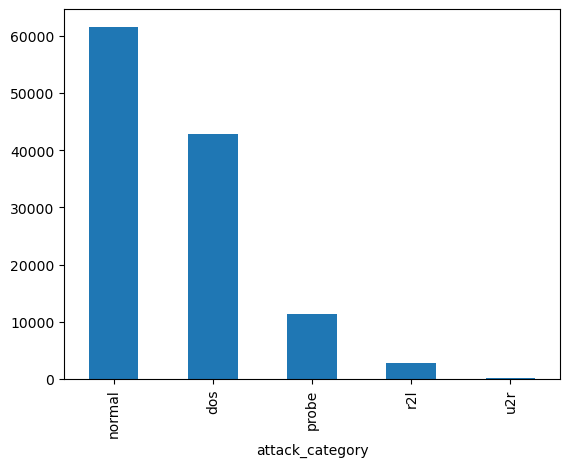

In [10]:
#Count each label samples in tranining and testing set
trainCats = trainY.value_counts()
testCats = testData['attack_category'].value_counts()
#Plot these counts of trian and test both
trainCats.plot(kind='bar')

In [11]:
# Importing preprocessing functions from sklearn library
from sklearn.preprocessing import StandardScaler #normalization
x_train = StandardScaler().fit_transform(trainX)
x_test = StandardScaler().fit_transform(testX)

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Convert categorical labels to numerical labels using LabelEncoder
label_encoder = LabelEncoder()
trainY_encoded = label_encoder.fit_transform(trainY)
testY_encoded = label_encoder.transform(testY)

# Convert numerical labels to one-hot encoding using OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
trainY = onehot_encoder.fit_transform(trainY_encoded.reshape(-1, 1))
testY = onehot_encoder.transform(testY_encoded.reshape(-1, 1))
labels = ['normal', 'dos', 'probe', 'r2l', 'u2r']

## Step 4: Predictive Modelling and Results Visualization

### 1D CNN Training and Validation

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model_cnn = models.Sequential()

# Add a 1D convolutional layer
model_cnn.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
model_cnn.add(layers.MaxPooling1D(pool_size=2))

# Flatten the output from the convolutional layer
model_cnn.add(layers.Flatten())

# Add a dense layer with 128 neurons
model_cnn.add(layers.Dense(128, activation='relu'))

# Add the output layer with 5 neurons
model_cnn.add(layers.Dense(5, activation='softmax'))

# Compile the model
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape the training and testing features data to be compatible with the model
x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Train the model
history_cnn = model_cnn.fit(x_train_reshaped, trainY, epochs=10, batch_size=64, validation_data=(x_test_reshaped, testY))





Epoch 1/10


1857/1857 [==============================] - 7s 3ms/step - loss: 0.1204 - accuracy: 0.9635 - val_loss: 0.0854 - val_accuracy: 0.9765
Epoch 2/10
1857/1857 [==============================] - 6s 3ms/step - loss: 0.0657 - accuracy: 0.9796 - val_loss: 0.0831 - val_accuracy: 0.9819
Epoch 3/10
1857/1857 [==============================] - 6s 3ms/step - loss: 0.0550 - accuracy: 0.9832 - val_loss: 0.0733 - val_accuracy: 0.9808
Epoch 4/10
1857/1857 [==============================] - 6s 3ms/step - loss: 0.0500 - accuracy: 0.9849 - val_loss: 0.0614 - val_accuracy: 0.9818
Epoch 5/10
1857/1857 [==============================] - 6s 3ms/step - loss: 0.0464 - accuracy: 0.9858 - val_loss: 0.0532 - val_accuracy: 0.9843
Epoch 6/10
1857/1857 [==============================] - 6s 3ms/step - loss: 0.0438 - accuracy: 0.9863 - val_loss: 0.0540 - val_accuracy: 0.9828
Epoch 7/10
1857/1857 [==============================] - 6s 3ms/step - loss: 0.0415 - accuracy: 0.9871 - val_loss: 0.0598 - val_acc

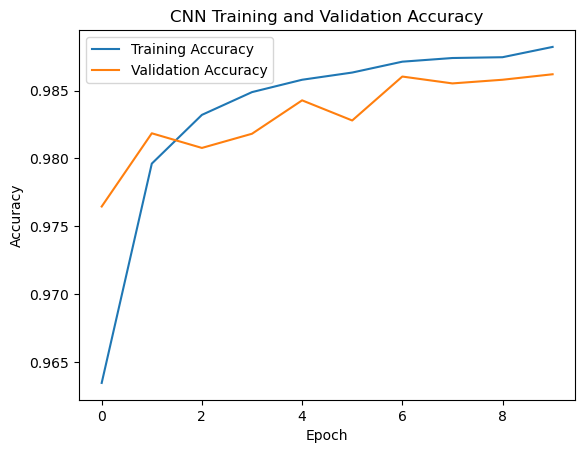

In [14]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

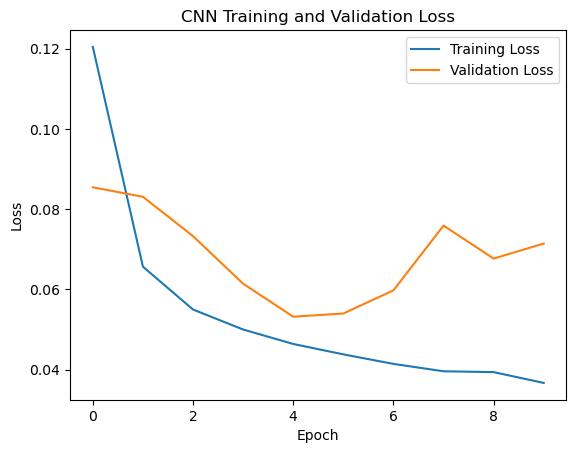

In [15]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
import numpy as np
from sklearn.metrics import classification_report

x_test_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Evaluate the model on the test set
loss_cnn, accuracy_cnn = model_cnn.evaluate(x_test_reshaped, testY)
print(f'Test Accuracy: {accuracy_cnn * 100:.2f}%')
true_labels_numerical = np.argmax(testY, axis=1)
# Make predictions on the test set
predictions_cnn = np.argmax(model_cnn.predict(x_test_reshaped), axis=1)

# Generate a classification report
report_cnn = pd.DataFrame(classification_report(true_labels_numerical, predictions_cnn, output_dict=True))
print("CNN Classification Report:\n", report_cnn)

929/929 [==============================] - 1s 1ms/step - loss: 0.0714 - accuracy: 0.9862
Test Accuracy: 98.62%
929/929 [==============================] - 1s 1ms/step
CNN Classification Report:
                       0             1            2           3          4  \
precision      0.996357      0.991403     0.959689    0.850065   0.795918   
recall         0.994684      0.985307     0.987268    0.899310   0.684211   
f1-score       0.995520      0.988346     0.973283    0.873995   0.735849   
support    10723.000000  15450.000000  2749.000000  725.000000  57.000000   

           accuracy     macro avg  weighted avg  
precision  0.986197      0.918687      0.986432  
recall     0.986197      0.910156      0.986197  
f1-score   0.986197      0.913399      0.986266  
support    0.986197  29704.000000  29704.000000  


In [17]:
# from sklearn.model_selection import train_test_split
# trainX, testX, trainY, testY = train_test_split(trainX, trainY, random_state=0)

### LSTM

In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model_lstm = models.Sequential()

# Add an LSTM layer
model_lstm.add(layers.LSTM(64, input_shape=(x_train.shape[1], 1), activation='relu'))

# Add a dense layer with 128 neurons
model_lstm.add(layers.Dense(128, activation='relu'))

# Add the output layer with 5 neurons
model_lstm.add(layers.Dense(5, activation='softmax'))

# Compile the model
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape the training and testing features data to be compatible with the model
x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Train the model
history_lstm = model_lstm.fit(x_train_reshaped, trainY, epochs=10, batch_size=64, validation_data=(x_test_reshaped, testY))


Epoch 1/10
1857/1857 [==============================] - 26s 14ms/step - loss: 73.9430 - accuracy: 0.8209 - val_loss: 0.6221 - val_accuracy: 0.8331
Epoch 2/10
1857/1857 [==============================] - 25s 13ms/step - loss: 0.5468 - accuracy: 0.8407 - val_loss: 0.4999 - val_accuracy: 0.8476
Epoch 3/10
1857/1857 [==============================] - 24s 13ms/step - loss: 0.4542 - accuracy: 0.8610 - val_loss: 0.4536 - val_accuracy: 0.8676
Epoch 4/10
1857/1857 [==============================] - 24s 13ms/step - loss: 0.4122 - accuracy: 0.8780 - val_loss: 0.3930 - val_accuracy: 0.8776
Epoch 5/10
1857/1857 [==============================] - 24s 13ms/step - loss: 0.3359 - accuracy: 0.8927 - val_loss: 0.2956 - val_accuracy: 0.9007
Epoch 6/10
1857/1857 [==============================] - 23s 12ms/step - loss: 0.2570 - accuracy: 0.9185 - val_loss: 0.2290 - val_accuracy: 0.9287
Epoch 7/10
1857/1857 [==============================] - 25s 13ms/step - loss: 0.1977 - accuracy: 0.9383 - val_loss: 0.2039 

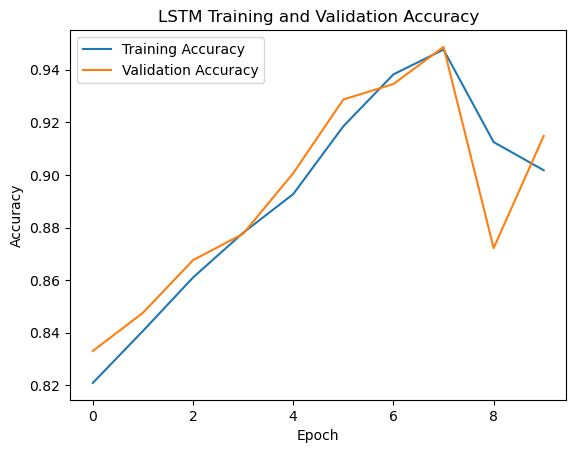

In [22]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history_lstm.history['accuracy'], label='Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

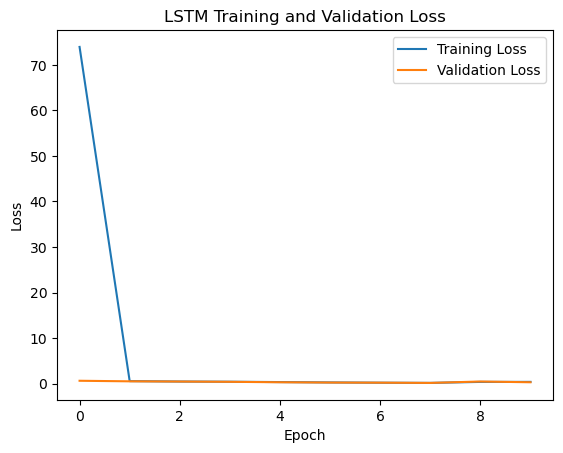

In [23]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
import numpy as np
from sklearn.metrics import classification_report

x_test_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Evaluate the model on the test set
loss_lstm, accuracy_lstm = model_lstm.evaluate(x_test_reshaped, testY)
print(f'Test Accuracy: {accuracy_lstm * 100:.2f}%')
true_labels_numerical = np.argmax(testY, axis=1)
# Make predictions on the test set
predictions_lstm = np.argmax(model_lstm.predict(x_test_reshaped), axis=1)

# Generate a classification report
report = pd.DataFrame(classification_report(true_labels_numerical, predictions_lstm, output_dict=True))
print("Classification Report:\n", report)

929/929 [==============================] - 4s 5ms/step - loss: 0.2940 - accuracy: 0.9149
Test Accuracy: 91.49%
929/929 [==============================] - 4s 5ms/step
Classification Report:
                       0             1            2           3     4  \
precision      0.942910      0.903389     0.871643    0.142857   0.0   
recall         0.948802      0.957476     0.802837    0.001379   0.0   
f1-score       0.945847      0.929647     0.835827    0.002732   0.0   
support    10723.000000  15450.000000  2749.000000  725.000000  57.0   

           accuracy     macro avg  weighted avg  
precision   0.91486      0.572160      0.894422  
recall      0.91486      0.542099      0.914860  
f1-score    0.91486      0.542810      0.902404  
support     0.91486  29704.000000  29704.000000  


### Conv-LSTM

In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model_con_lstm = models.Sequential()

# Add a 1D convolutional layer followed by an LSTM layer
model_con_lstm.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
model_con_lstm.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model_con_lstm.add(layers.MaxPooling1D(pool_size=2))
model_con_lstm.add(layers.LSTM(64, activation='relu'))

# Flatten the output from the LSTM layer
model_con_lstm.add(layers.Flatten())

# Add a dense layer with 128 neurons
model_con_lstm.add(layers.Dense(128, activation='relu'))

# Add the output layer with 5 neurons
model_con_lstm.add(layers.Dense(5, activation='softmax'))

# Compile the model
model_con_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape the training and testing features data to be compatible with the model
x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Train the model
history_con_lstm = model_con_lstm.fit(x_train_reshaped, trainY, epochs=10, batch_size=64, validation_data=(x_test_reshaped, testY))

Epoch 1/10
1857/1857 [==============================] - 20s 10ms/step - loss: 0.2100 - accuracy: 0.9358 - val_loss: 0.1080 - val_accuracy: 0.9615
Epoch 2/10
1857/1857 [==============================] - 18s 10ms/step - loss: 0.0908 - accuracy: 0.9708 - val_loss: 0.0822 - val_accuracy: 0.9733
Epoch 3/10
1857/1857 [==============================] - 18s 10ms/step - loss: 0.0691 - accuracy: 0.9779 - val_loss: 0.0654 - val_accuracy: 0.9775
Epoch 4/10
1857/1857 [==============================] - 18s 10ms/step - loss: 0.1028 - accuracy: 0.9721 - val_loss: 0.1848 - val_accuracy: 0.9539
Epoch 5/10
1857/1857 [==============================] - 18s 10ms/step - loss: 0.0805 - accuracy: 0.9761 - val_loss: 0.0963 - val_accuracy: 0.9689
Epoch 6/10
1857/1857 [==============================] - 18s 10ms/step - loss: 0.0785 - accuracy: 0.9766 - val_loss: 0.0781 - val_accuracy: 0.9738
Epoch 7/10
1857/1857 [==============================] - 19s 10ms/step - loss: 0.0650 - accuracy: 0.9798 - val_loss: 0.0675 -

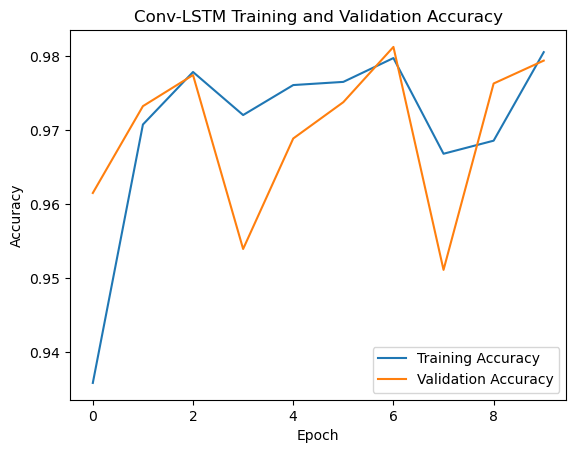

In [28]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history_con_lstm.history['accuracy'], label='Training Accuracy')
plt.plot(history_con_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('Conv-LSTM Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

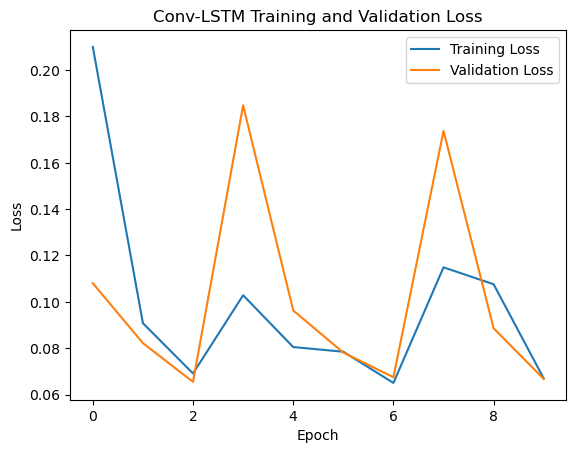

In [30]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history_con_lstm.history['loss'], label='Training Loss')
plt.plot(history_con_lstm.history['val_loss'], label='Validation Loss')
plt.title('Conv-LSTM Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
import numpy as np
from sklearn.metrics import classification_report

x_test_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Evaluate the model on the test set
loss_con_lstm, accuracy_con_lstm = model_con_lstm.evaluate(x_test_reshaped, testY)
print(f'Conv-LSTM Test Accuracy: {accuracy_con_lstm * 100:.2f}%')
true_labels_numerical = np.argmax(testY, axis=1)
# Make predictions on the test set
predictions_con_lstm = np.argmax(model_con_lstm.predict(x_test_reshaped), axis=1)

# Generate a classification report
report_con_lstm = pd.DataFrame(classification_report(true_labels_numerical, predictions_con_lstm, output_dict=True))
print("Conv-LSTM Classification Report:\n", report_con_lstm)

929/929 [==============================] - 3s 3ms/step - loss: 0.0667 - accuracy: 0.9794
Conv-LSTM Test Accuracy: 97.94%
929/929 [==============================] - 3s 3ms/step
Conv-LSTM Classification Report:
                       0             1            2           3          4  \
precision      0.994212      0.975043     0.959227    0.920635   0.840000   
recall         0.993192      0.988738     0.975628    0.640000   0.368421   
f1-score       0.993702      0.981843     0.967358    0.755085   0.512195   
support    10723.000000  15450.000000  2749.000000  725.000000  57.000000   

           accuracy     macro avg  weighted avg  
precision   0.97943      0.937824      0.978912  
recall      0.97943      0.793196      0.979430  
f1-score    0.97943      0.842037      0.978348  
support     0.97943  29704.000000  29704.000000  


#### Bar plot comparison between accuracy of different algorithms

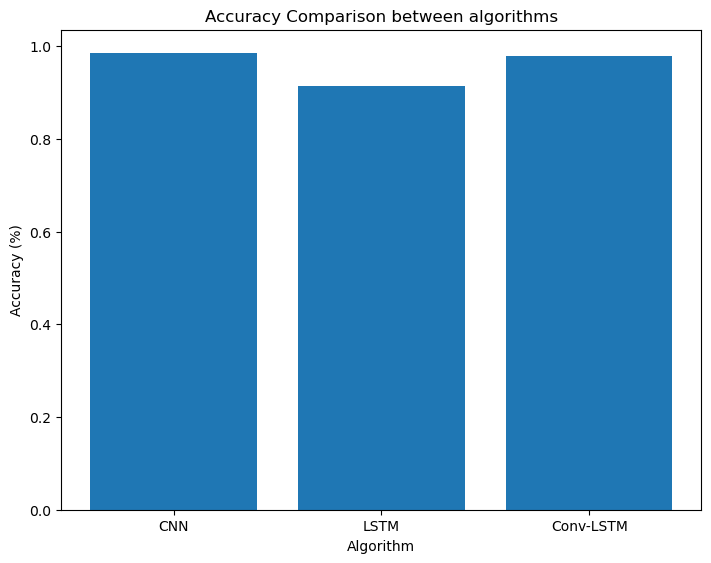

In [32]:
all_acc = [accuracy_cnn, accuracy_lstm, accuracy_con_lstm]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algos = ['CNN', 'LSTM', 'Conv-LSTM']
ax.bar(algos, all_acc)
plt.title('Accuracy Comparison between algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy (%)')
plt.show()

# The END